In [12]:
%pylab inline

import pandas as pd
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, roc_auc_score

import datetime, time

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [13]:
# Read data
wnv_train = pd.read_csv('../working/train_d.csv', index_col=0)
wnv_test = pd.read_csv('../working/test_f.csv', index_col=0)
#f_names = wnv_train.columns[2:]

In [14]:
# convert list of labels to binary class matrix
labels = wnv_train.WnvPresent.values.astype('int')
yr_train = labels
wnv_train.drop('NumMosquitos', axis=1, inplace=True)
wnv_train.drop('WnvPresent', axis=1, inplace=True)
f_names = wnv_train.columns

In [15]:
# raw data
#yr_train = wnv_train[:,1].astype(int)
Xr_train =(wnv_train.values).astype('float64')
Xr_test = (wnv_test.values).astype('float64')

# normalize data
scaler = StandardScaler()
scaler.fit(Xr_train)
Xn_train = scaler.transform(Xr_train)
Xn_test = scaler.transform(Xr_test)

X_train, X_test, y_train, y_test = train_test_split(Xn_train, yr_train)

In [16]:
#clf = KNeighborsClassifier(n_neighbors=30)
clf = ExtraTreesClassifier(n_estimators=5000, n_jobs=3)
#clf.fit(X_train, y_train)
clf.fit(Xn_train, yr_train)

# use the model to predict the labels of the test data
#predicted = clf.predict(X_test)
proba = clf.predict_proba(X_test)
expected = y_test

In [17]:
# accuracy
#matches = (predicted == expected)
#print matches.sum() / float(len(matches))

# f1 score
#print classification_report(expected, predicted)

# confusion matrix
#print confusion_matrix(expected, predicted)

# auc
print roc_auc_score(expected, proba[:,1])

0.992038026597


Area under the ROC curve : 0.992038


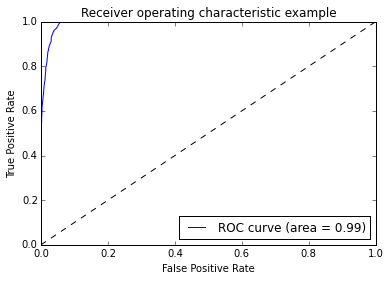

In [18]:
#print np.count_nonzero(predicted == 1)
#print np.count_nonzero(y_test)
#np.max(proba[:,1])
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(expected, proba[:,1])
roc_auc = auc(fpr, tpr)
print "Area under the ROC curve : %f" % roc_auc

# Plot ROC curve
plt.clf()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [19]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(f_names)):
#for f in range(15):
    print("%d. %s (%f)" % (f + 1, f_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. Longitude (0.245571)
2. Latitude (0.233087)
3. CULEX RESTUANS (0.037478)
4. CULEX PIPIENS/RESTUANS (0.029670)
5. CULEX PIPIENS (0.025095)
6. Week (0.011263)
7. Year (0.008636)
8. DewPoint_1_a21 (0.008221)
9. DewPoint_1_a14 (0.007010)
10. Tavg_2_a21 (0.005842)
11. Cool_2_a21 (0.005529)
12. Tmin_2_a21 (0.005515)
13. Tmin_1_a21 (0.005340)
14. Tavg_1_a21 (0.005156)
15. WetBulb_1_a14 (0.005062)
16. WetBulb_1_a21 (0.004951)
17. ResultSpeed_1_a21 (0.004928)
18. AvgSpeed_1_a21 (0.004824)
19. Cool_1_a21 (0.004620)
20. Tmin_1_a14 (0.004403)
21. CULEX TERRITANS (0.004293)
22. Tmax_2_a21 (0.004255)
23. DewPoint_2_a21 (0.004184)
24. StnPressure_2_d4 (0.004114)
25. DewPoint_2_a14 (0.004075)
26. StnPressure_1_d4 (0.003627)
27. SeaLevel_2_d4 (0.003612)
28. Tmin_2_a14 (0.003565)
29. ResultSpeed_1_a14 (0.003548)
30. Tmax_1_a21 (0.003537)
31. DewPoint_1_d1 (0.003462)
32. ResultSpeed_2_a21 (0.003341)
33. DewPoint_2_d1 (0.003316)
34. WetBulb_2_a21 (0.003296)
35. DewPoint_1_a7 (0.003217)

In [20]:
proba = clf.predict_proba(Xn_test)
print np.max(proba[:,1])

0.43328153438


In [21]:
st = datetime.datetime.fromtimestamp(time.time()).strftime('%Y%m%d_%H%M%S')

def write_preds(proba, fname):
    pd.DataFrame({"Id": list(range(1,len(proba)+1)), "WnvPresent": proba}).to_csv(fname, index=False, header=True)

write_preds(proba[:,1], "../working/sklearn_test_" + st + ".csv")